# Welcome to the Spiral Analysis tutorial!
#### This tutorial will aim to guide you through everything you need to obtain data to analyse spiral galaxies.
It's pretty chill.

This program uses data from the **Galaxy Zoo: 3D** project at Zooniverse as well as the DAP maps from **MaNGA**. The `SpiralGalaxy` class in our program allows for access to galaxy attriutes and the main galaxy dataframe, which holds certain information about individual spaxels in order to calculate SFR according to [this paper right here](https://arxiv.org/abs/astro-ph/9807187) by Robert C. Kennicutt. Our program piggybacks off of the GZ3D Production program right [here](https://github.com/CKrawczyk/GZ3D_production) by Coleman Krawczyk, so shoutouts!

### Finding a good sample from the GZ3D FITS files

The available GZ3D FITS files have a lot of galaxies in them. Many of them have spiral arm markings that haven't been properly marked because of ambiguity in visual images of the galaxies and possibly other galaxies. By setting a minimum percentage of pixels marked in the visual image and setting a threshold for the minimum amount of people identifying a particular pixel as, say, a spiral, we make sure that we get galaxies that have strongly identifiable features. So we're going to do that.

First we acquire a list of all FITS files available. We can use the following function to gather strings of paths for the files. You can point the function to a folder where the files are.

In [1]:
import os

In [2]:
def append_directory(path):
    fits_list = []
    
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".fits.gz"):
                element = str(path) + str(file)
                fits_list.append(element)
    return fits_list

In [3]:
# This is pointing to where my files are located on my computer
fits_list = append_directory('/home/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/')

Next we aim to sort out the galaxies with respect to a minimum pixel percentage identified as a spiral by a minimum threshold of people.

In [4]:
from spiral_galaxy import SpiralGalaxy

/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/extern/marvin_brain/python/brain/__init__.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(open(os.path.join(os.path.dirname(__file__), 'data/brain.yml')))
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/__init__.py:128: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/extern/tree/python/tree/__init__.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(ff)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/

INFO: No release version set. Setting default to MPL-8


/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
def append_usable_galaxies(fits_list):
    usable_galaxy_list = []
    load_failure = []
    
    for path in fits_list:
        try:
            try:
                gal = SpiralGalaxy(path)
                
            except:
                gal = SpiralGalaxy(path)
                
        except Exception as e:
            load_failure.append((path.split('/')[-1].split('_')[0], e))
            continue
            
        if gal.check_usability(threshold=5, pix_percentage=1.0):
            usable_galaxy_list.append(gal)
            
    return usable_galaxy_list, load_failure

We use the above function to make a `SpiralGalaxy` object from the FITS file path. The `SpiralGalaxy` object is defined in the `spiralgalaxy.py` file. `SpiralGalaxy` has a method called `check_usability` which takes in a minimum percentage and threshold, which are set as **1.5%** and **5** respectively. We can change them by providing separate values.

In [6]:
gal_objs, failed = append_usable_galaxies(fits_list)

/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:1085: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  value = np.asscalar(value)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-277858. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-256048. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.

/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-113567. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-211017. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-256104. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-210700. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/gene

/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-256104. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-234431. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-210611. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/general.py:355: MarvinUserWarning: more than one plate-ifu found for mangaid=1-113567. Using the one with the highest SN2.
  MarvinUserWarning)
/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/utils/general/gene

### Getting integrated SFRs

We have now assembled a list of some galaxies to use for our analysis. We can now iterate over our list and perform the SFR and flux calculation in all of them. This will take some time, which is why they don't calculate this upon initialisation.

In [7]:
for gal in gal_objs:
    try:
        gal.form_sfr_cols()
    except Exception as e:
        print('{} cut mask object did not have a mask object.'.format(gal.mangaid), e)
        gal_objs.remove(gal)
        continue

1-574355 cut mask object did not have a mask object. 'Quantity' object has no 'mask' member


We now have a list of galaxies with the SFR calculated! Next we can make lists of the integrated SFRs from each galaxy. This is the total SFR within one effective (Petrosian) radius, and the amount inside and outside the spiral arms.

We will make lists for both the values and the standard deviation for the values. The `get_integrated_sfr` method in the `SpiralGalaxy` class provides  the integrated SFR within `1 RE`. We can choose to get the SFR inside and outside spiral arms, or the total SFR. The function by default provides the total SFR, but it can be modified by inputting `mode` as `spirals`, `non-spirals`, or `all`.

In [9]:
tot_sfr_vals = []
spiral_sfr_vals = []
non_spiral_sfr_vals = []

tot_sfr_stdv = []
spiral_sfr_stdv = []
non_spiral_sfr_stdv = []

for gal in gal_objs:
    tot_sfr_vals.append(gal.get_integrated_sfr(filter_radii = .4)[0])
    tot_sfr_stdv.append(gal.get_integrated_sfr(filter_radii = .4)[1])
    
    spiral_sfr_vals.append(gal.get_integrated_sfr(mode='spirals', filter_radii = .4)[0])
    spiral_sfr_stdv.append(gal.get_integrated_sfr(mode='spirals', filter_radii = .4)[1])
    
    non_spiral_sfr_vals.append(gal.get_integrated_sfr(mode='non-spirals', filter_radii = .4)[0])
    non_spiral_sfr_stdv.append(gal.get_integrated_sfr(mode='non-spirals', filter_radii = .4)[1])

### Comparing SFR ratios between GZ3D and MaNGA DAPall

The MaNGA DAPall file also provides with a measure of the total integrated SFR within `1 RE`, which we can use to compare measurements.

In [10]:
sfr_dapall = [gal.maps.dapall['sfr_1re'] for gal in gal_objs]

/home/sshamsi/miniconda3/envs/gz3d/lib/python3.7/site-packages/marvin/tools/mixins/dapall.py:53: ResourceWarning: unclosed file <_io.FileIO name='/home/sshamsi/sas/mangawork/manga/spectro/analysis/v2_5_3/2.3.0/dapall-v2_5_3-2.3.0.fits' mode='rb' closefd=True>
  dapall_data = self._get_dapall_from_file()


In [11]:
calc_dap_ratio = []

for i in range(len(gal_objs)):
    calc_dap_ratio.append(tot_sfr_vals[i]/sfr_dapall[i])

We can plot a histogram to see how the two measurements compare

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

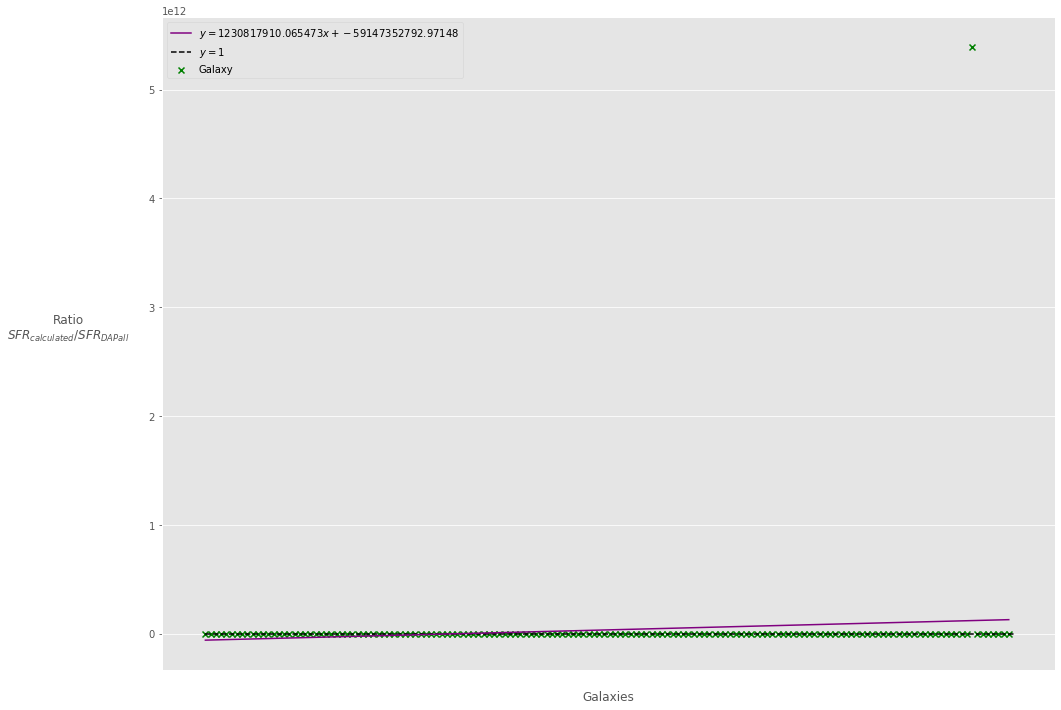

In [13]:
fig = plt.figure(figsize = (16, 12))

plt.hlines(y=1, xmin=0, xmax=len(calc_dap_ratio), linestyle = '--', label = '$y=1$')
plt.scatter(np.arange(len(calc_dap_ratio)), calc_dap_ratio, color='g', marker='x', label='Galaxy')

lobf = np.polyfit(np.arange(len(calc_dap_ratio)), calc_dap_ratio, 1)
plt.plot(np.arange(len(calc_dap_ratio)), np.poly1d(lobf)(np.arange(len(calc_dap_ratio))), label = '$y = {} x + {}$'.format(lobf[0], lobf[1]), color='purple')

plt.xticks([], [])

#plt.ylim(0, 25)

plt.ylabel('Ratio\n$SFR_{calculated}/SFR_{DAPall}$', rotation=0, labelpad=80)
plt.xlabel('Galaxies', labelpad = 20)

plt.legend()

### Visualising the percentage of SFR in Spiral Arms

In [14]:
sfr_pc_spiral = []
sfr_pc_spiral_stdv = []

for i in range(len(gal_objs)):
    pc = 100 * spiral_sfr_vals[i]/tot_sfr_vals[i]
    
    sfr_pc_spiral.append(pc)
    sfr_pc_spiral_stdv.append(pc * ((spiral_sfr_stdv[i]/spiral_sfr_vals[i]) + (tot_sfr_stdv[i]/tot_sfr_vals[i])))

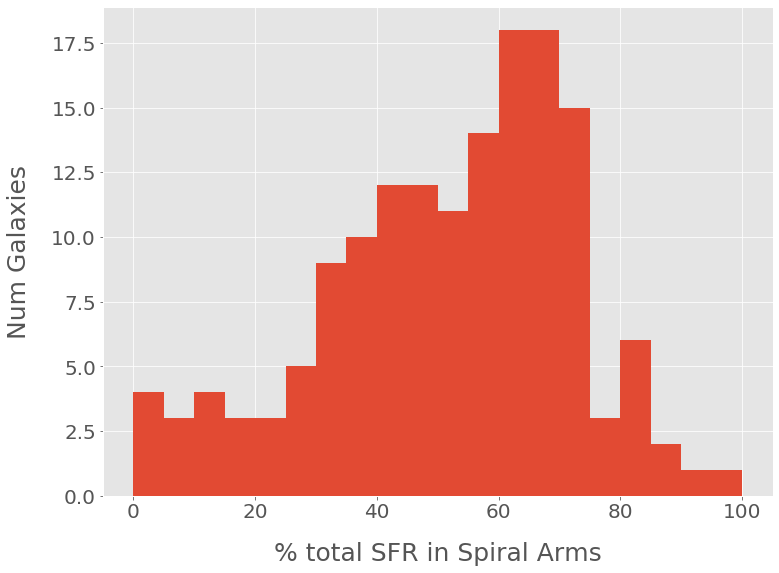

In [15]:
fig = plt.figure(figsize=(12, 9))

plt.hist(sfr_pc_spiral, bins = 20)

plt.xlabel('% total SFR in Spiral Arms', labelpad=20, size=25)
plt.ylabel('Num Galaxies', labelpad=20, size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('sfr_in_spirals_hist')

In [16]:
sfr_pc_spiral.sort()

len(sfr_pc_spiral)

154

In [17]:
(sfr_pc_spiral[76] + sfr_pc_spiral[77])/2

55.16280441244231

In [18]:
from functools import reduce

In [19]:
reduce(lambda x, y: x + y, sfr_pc_spiral) / len(sfr_pc_spiral)

51.717010675504866

### Creating an overall galactic DataFrame

In [152]:
mass_list = []
mangaid_list = []

for gal in gal_objs:    
    mass_list.append(gal.get_lgmass())
    mangaid_list.append(gal.mangaid)

In [153]:
import pandas as pd

In [154]:
main_df = pd.DataFrame()

In [155]:
main_df['mangaid'] = mangaid_list
main_df['tot_sfr'] = tot_sfr_vals
main_df['sig_tot_sfr'] = tot_sfr_stdv
main_df['spiral_sfr'] = spiral_sfr_vals
main_df['sig_spiral_sfr'] = spiral_sfr_stdv
main_df['nonspiral_sfr'] = non_spiral_sfr_vals
main_df['sig_nonspiral_sfr'] = non_spiral_sfr_stdv
main_df['dap_sfr'] = sfr_dapall
main_df['lgmass'] = mass_list

In [156]:
main_df['pc_in_spirals'] = sfr_pc_spiral
main_df['sig_pc_in_spirals'] = sfr_pc_spiral_stdv

### Creating a scatter for SFR percentage in spirals vs. mass

In [174]:
sfr_pcs = main_df.pc_in_spirals.values
sig_sfr_pcs = main_df.sig_pc_in_spirals.values
gal_masses = main_df.lgmass.values

In [175]:
len(sfr_pcs)

154

In [176]:
remove_index = []

for i in range(len(sfr_pcs)):
    if sig_sfr_pcs[i] > sfr_pcs[i]:
        remove_index.append(i)

In [179]:
new_sfr_pcs = np.delete(sfr_pcs, remove_index)
new_sig_sfr_pcs = np.delete(sig_sfr_pcs, remove_index)
new_gal_masses = np.delete(gal_masses, remove_index)

In [180]:
len(new_sfr_pcs)

145

Text(0.5, 1.0, '145 galaxies filtered with parameter: sig_percentage < percentage')

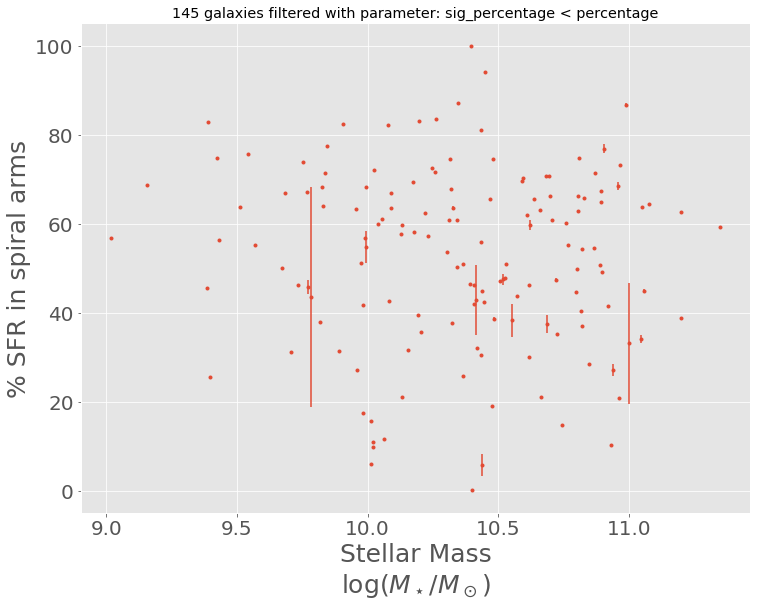

In [184]:
plt.figure(figsize=(12, 9))
plt.errorbar(new_gal_masses, new_sfr_pcs, yerr=new_sig_sfr_pcs, fmt='.')
#plt.ylim(-20, 120)
plt.ylabel('% SFR in spiral arms', size=25)
plt.yticks(size=20)
plt.xlabel('Stellar Mass\n$\log(M_\star/M_\odot)$', size=25)
plt.xticks(size=20)
plt.title('145 galaxies filtered with parameter: sig_percentage < percentage')

Text(0.5, 1.0, '154 galaxies with y limit adjusted')

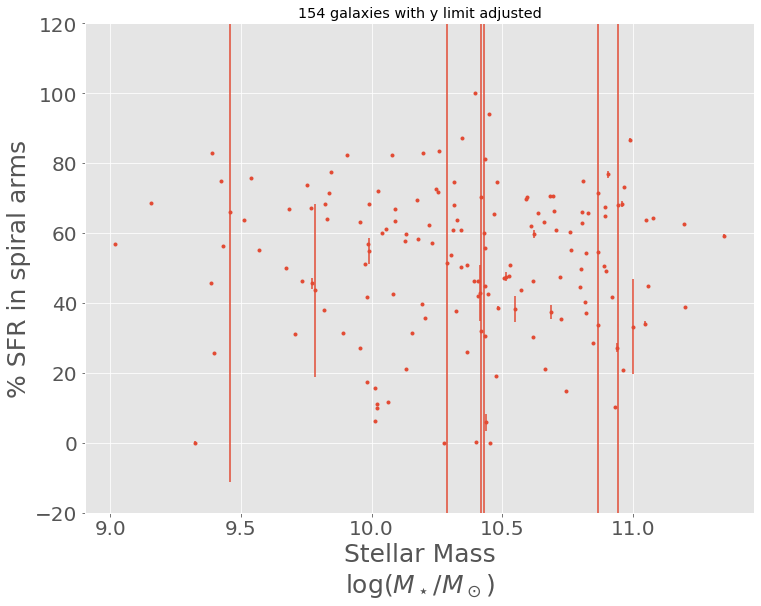

In [183]:
plt.figure(figsize=(12, 9))
plt.errorbar(gal_masses, sfr_pcs, yerr=sig_sfr_pcs, fmt='.')
plt.ylim(-20, 120)
plt.ylabel('% SFR in spiral arms', size=25)
plt.yticks(size=20)
plt.xlabel('Stellar Mass\n$\log(M_\star/M_\odot)$', size=25)
plt.xticks(size=20)
plt.title('154 galaxies with y limit adjusted')

### Creating spiral arm SFR as a function of galactic mass

In [ ]:
main_df = main_df[2 * main_df.sig_pc_in_spirals < main_df.pc_in_spirals]

In [135]:
labels = np.arange(1, 11)

main_df['mass_bin'] = pd.qcut(main_df['lgmass'], len(labels), labels = labels)

In [136]:
avg_pc_spirals_binned = main_df.groupby('mass_bin').pc_in_spirals.mean().values

In [137]:
main_df['sig2_pc_in_spirals'] = main_df.sig_pc_in_spirals ** 2

sig_avg_pc_spirals_binned = (main_df.groupby('mass_bin').sig2_pc_in_spirals.mean() ** 0.5).values

In [138]:
output, qcut_bins = pd.qcut(main_df.lgmass, len(labels), labels = labels, retbins=True)

In [139]:
xtick_labels = []

for i in range(len(qcut_bins) - 1):
    xtick_labels.append("{0:.2f}\n{1} Galaxies".format(((qcut_bins[i] + qcut_bins[i + 1])/2), main_df.groupby('mass_bin').mangaid.count()[i]))

In [140]:
xtick_labels1 = []

for i in range(len(qcut_bins) - 1):
    xtick_labels1.append("{:.2f}".format((qcut_bins[i] + qcut_bins[i + 1])/2))

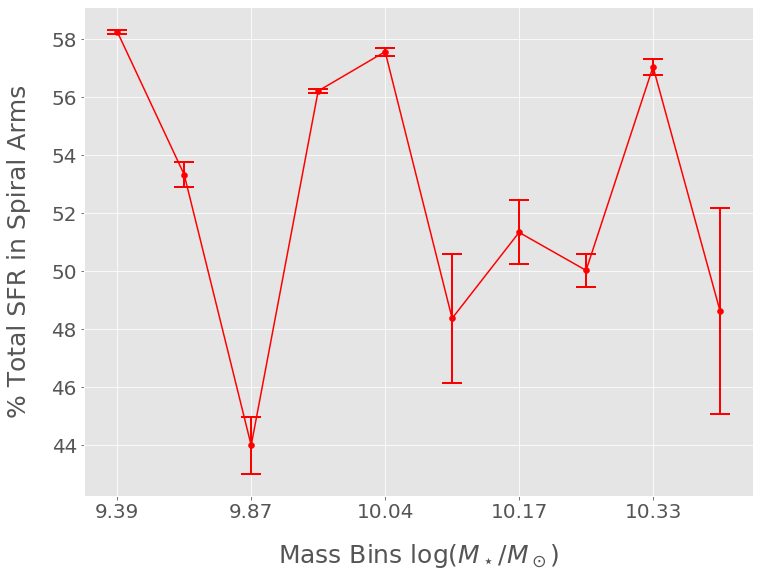

In [142]:
fig = plt.figure(figsize=(12, 9))

plt.plot(labels, avg_pc_spirals_binned, color='red')
plt.scatter(labels, avg_pc_spirals_binned, color='red')

plt.errorbar(labels, avg_pc_spirals_binned, fmt='none', elinewidth=2, ecolor='red', capsize=10, capthick=2,
             yerr=sig_avg_pc_spirals_binned)

plt.xlabel('Mass Bins $\log(M_\star/M_\odot)$', labelpad=20, fontsize=25)
plt.xticks(np.arange(1, 11, 2), labels=xtick_labels1, fontsize=20)
plt.yticks(fontsize = 20)
plt.ylabel('% Total SFR in Spiral Arms', fontsize=25, labelpad=20)
plt.savefig('sfr_pc_vs_mass_10bins')

In [122]:
xtick_labels

['9.50\n29 Galaxies',
 '10.12\n29 Galaxies',
 '10.37\n28 Galaxies',
 '10.64\n29 Galaxies',
 '11.08\n28 Galaxies']

In [125]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

### Creating an overall spaxel DataFrame

In [91]:
gal_dfs = []

for gal in gal_objs:
    gal.spax_df['lgmass'] = gal.get_lgmass()
    gal_dfs.append(gal.spax_df)

In [92]:
main_spax_df = pd.concat(gal_dfs, ignore_index=True)

In [93]:
main_spax_df

,radius,ha_flux,sig_ha_flux,hb_flux,sig_hb_flux,spaxel_type,r_re,sfr,sig_sfr,lgmass
0,16.0,3.219338,0.054566,0.902845,0.038748,Spiral,1.214676,0.009212,0.001070,10.454148
1,16.0,3.570421,0.056320,0.939417,0.040250,Spiral,1.214676,0.011877,0.001356,10.454148
2,16.0,3.568676,0.054572,0.955439,0.038339,Spiral,1.214676,0.011394,0.001228,10.454148
3,15.0,3.511824,0.057939,0.948434,0.041610,Spiral,1.138758,0.010985,0.001290,10.454148
4,15.0,3.729096,0.055288,1.007462,0.042708,Spiral,1.138758,0.011655,0.001303,10.454148
5,15.0,4.045213,0.057125,1.094456,0.041866,Spiral,1.138758,0.012599,0.001285,10.454148
6,15.0,4.277768,0.058522,1.157105,0.044391,Spiral,1.138758,0.013331,0.001354,10.454148
7,15.0,4.444105,0.057122,1.139207,0.041132,Spiral,1.138758,0.015722,0.001502,10.454148
8,15.0,4.341950,0.060672,1.046246,0.042559,Spiral,1.138758,0.017775,0.001900,10.454148
9,15.0,3.911884,0.055694,0.959769,0.042192,Spiral,1.138758,0.015347,0.001753,10.454148


In [94]:
rad_bins = np.arange(0, 1.1, 0.1)

In [95]:
main_spax_df['rad_bin'] = pd.cut(main_spax_df.r_re, rad_bins, labels = np.arange(1, len(rad_bins)))

In [96]:
main_spax_df = main_spax_df.dropna()

In [97]:
main_spax_df = main_spax_df[main_spax_df.sig_sfr < main_spax_df.sfr]

In [98]:
main_spax_df['lgmass_bin'] = pd.qcut(main_spax_df['lgmass'], 3, labels = [1, 2, 3])

In [99]:
out, bins = pd.qcut(main_spax_df['lgmass'], 3, labels = [1, 2, 3], retbins=True)

In [100]:
main_spax_df['sig2_sfr'] = (main_spax_df.sig_sfr ** 2)

In [101]:
xtick_labels = []

for i in range(len(qcut_bins) - 1):
    xtick_labels.append("{0:.2f}\n{1} Galaxies".format(((qcut_bins[i] + qcut_bins[i + 1])/2), main_df.groupby('mass_bin').mangaid.count()[i]))

In [102]:
radbin_spiral_sfr1 = main_spax_df[(main_spax_df.spaxel_type == 'Spiral') & (main_spax_df.lgmass_bin==1)].groupby('rad_bin').sfr.mean().values
sig_radbin_spiral_sfr1 = (main_spax_df[(main_spax_df.spaxel_type == 'Spiral') & (main_spax_df.lgmass_bin==1)].groupby('rad_bin').sig2_sfr.mean().values) ** 0.5

radbin_spiral_sfr2 = main_spax_df[(main_spax_df.spaxel_type == 'Spiral') & (main_spax_df.lgmass_bin==2)].groupby('rad_bin').sfr.mean().values
sig_radbin_spiral_sfr2 = (main_spax_df[(main_spax_df.spaxel_type == 'Spiral') & (main_spax_df.lgmass_bin==2)].groupby('rad_bin').sig2_sfr.mean().values) ** 0.5

radbin_spiral_sfr3 = main_spax_df[(main_spax_df.spaxel_type == 'Spiral') & (main_spax_df.lgmass_bin==3)].groupby('rad_bin').sfr.mean().values
sig_radbin_spiral_sfr3 = (main_spax_df[(main_spax_df.spaxel_type == 'Spiral') & (main_spax_df.lgmass_bin==3)].groupby('rad_bin').sig2_sfr.mean().values) ** 0.5


radbin_nspiral_sfr1 = main_spax_df[(main_spax_df.spaxel_type == 'Non Spiral') & (main_spax_df.lgmass_bin==1)].groupby('rad_bin').sfr.mean().values
sig_radbin_nspiral_sfr1 = (main_spax_df[(main_spax_df.spaxel_type == 'Non Spiral') & (main_spax_df.lgmass_bin==1)].groupby('rad_bin').sig2_sfr.mean().values) ** 0.5

radbin_nspiral_sfr2 = main_spax_df[(main_spax_df.spaxel_type == 'Non Spiral') & (main_spax_df.lgmass_bin==2)].groupby('rad_bin').sfr.mean().values
sig_radbin_nspiral_sfr2 = (main_spax_df[(main_spax_df.spaxel_type == 'Non Spiral') & (main_spax_df.lgmass_bin==2)].groupby('rad_bin').sig2_sfr.mean().values) ** 0.5

radbin_nspiral_sfr3 = main_spax_df[(main_spax_df.spaxel_type == 'Non Spiral') & (main_spax_df.lgmass_bin==3)].groupby('rad_bin').sfr.mean().values
sig_radbin_nspiral_sfr3 = (main_spax_df[(main_spax_df.spaxel_type == 'Non Spiral') & (main_spax_df.lgmass_bin==3)].groupby('rad_bin').sig2_sfr.mean().values) ** 0.5

In [103]:
radbin_delta_sfr1 = radbin_spiral_sfr1 - radbin_nspiral_sfr1
radbin_delta_sfr2 = radbin_spiral_sfr2 - radbin_nspiral_sfr2
radbin_delta_sfr3 = radbin_spiral_sfr3 - radbin_nspiral_sfr3

In [104]:
quad = lambda x, y : (x ** 2 + y ** 2) ** 0.5

sig_radbin_delta_sfr1 = [quad(sig_radbin_spiral_sfr1[i], sig_radbin_nspiral_sfr1[i]) for i in range(len(radbin_delta_sfr1))]
sig_radbin_delta_sfr2 = [quad(sig_radbin_spiral_sfr2[i], sig_radbin_nspiral_sfr2[i]) for i in range(len(radbin_delta_sfr2))]
sig_radbin_delta_sfr3 = [quad(sig_radbin_spiral_sfr3[i], sig_radbin_nspiral_sfr3[i]) for i in range(len(radbin_delta_sfr3))]

In [106]:
relative_sfr1 = np.divide(radbin_delta_sfr1, radbin_nspiral_sfr1)
relative_sfr2 = np.divide(radbin_delta_sfr2, radbin_nspiral_sfr2)
relative_sfr3 = np.divide(radbin_delta_sfr3, radbin_nspiral_sfr3)

In [107]:
sig_relative_sfr1 = [relative_sfr1[i] * (sig_radbin_delta_sfr1[i]/radbin_delta_sfr1[i] +
                                         sig_radbin_nspiral_sfr1[i]/radbin_nspiral_sfr1[i]) 
                     for i in range(len(relative_sfr1))]

sig_relative_sfr2 = [relative_sfr2[i] * (sig_radbin_delta_sfr2[i]/radbin_delta_sfr2[i] +
                                         sig_radbin_nspiral_sfr2[i]/radbin_nspiral_sfr2[i]) 
                     for i in range(len(relative_sfr2))]

sig_relative_sfr3 = [relative_sfr3[i] * (sig_radbin_delta_sfr3[i]/radbin_delta_sfr3[i] +
                                         sig_radbin_nspiral_sfr3[i]/radbin_nspiral_sfr3[i]) 
                     for i in range(len(relative_sfr3))]

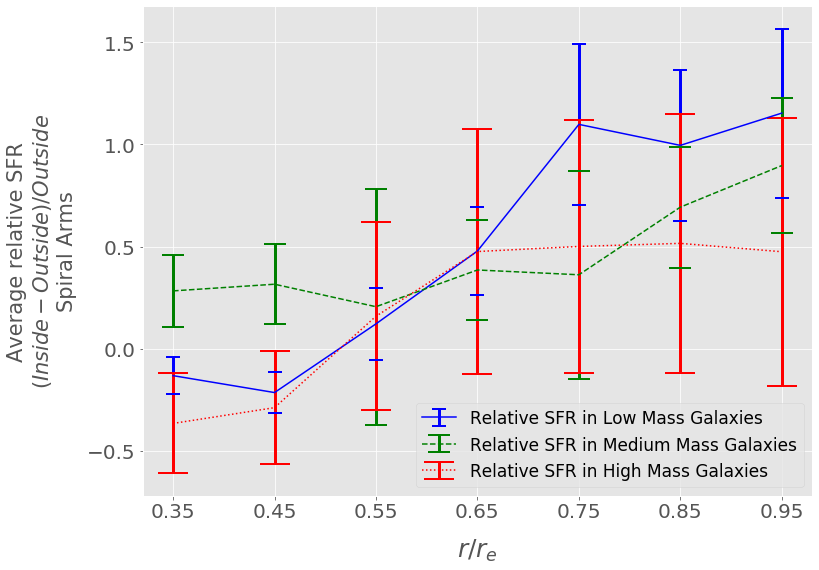

In [145]:
fig = plt.figure(figsize=(12, 9))

x = np.arange(len(rad_bins) - 1)

plt.errorbar(x[3:], relative_sfr1[3:], fmt='-b', elinewidth=3, ecolor='b', capsize=7, markeredgewidth=2, yerr=sig_relative_sfr1[3:], label='Relative SFR in Low Mass Galaxies')
plt.errorbar(x[3:], relative_sfr2[3:], fmt='--g', elinewidth=3, ecolor='g', capsize=11, markeredgewidth=2, yerr=sig_relative_sfr2[3:], label='Relative SFR in Medium Mass Galaxies')
plt.errorbar(x[3:], relative_sfr3[3:], fmt=':r', elinewidth=3, ecolor='r', capsize=15, markeredgewidth=2, yerr=sig_relative_sfr3[3:], label='Relative SFR in High Mass Galaxies')

plt.xlabel('$r/r_e$', fontsize=25, labelpad=15)
plt.ylabel('Average relative SFR\n$(Inside - Outside)/Outside$\nSpiral Arms', fontsize=21, labelpad=10)

plt.xticks([3, 4, 5, 6, 7, 8, 9], [0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 17}, loc=4)
plt.savefig('relative_rad_binned_everything')

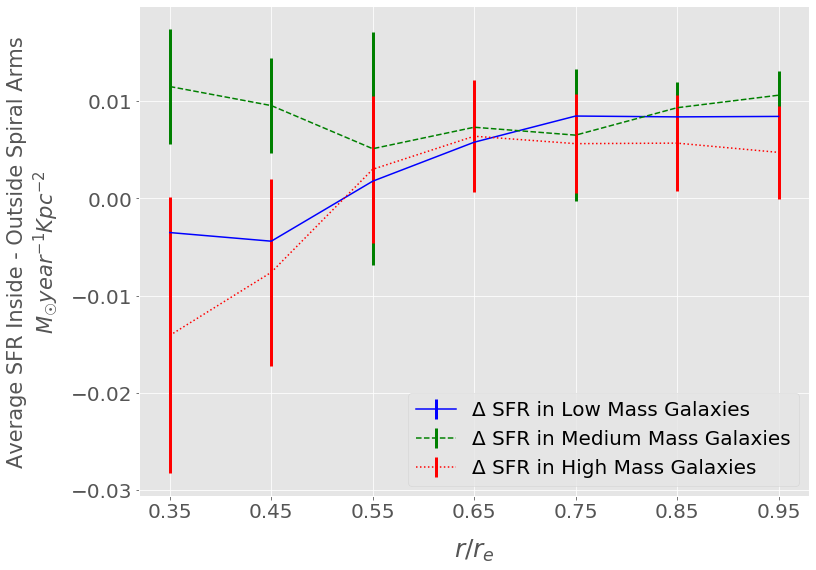

In [105]:
fig = plt.figure(figsize=(12, 9))

x = np.arange(len(rad_bins) - 1)

plt.errorbar(x[3:], radbin_delta_sfr1[3:], fmt='-b', elinewidth=3, ecolor='b', capsize=0, yerr=sig_radbin_delta_sfr1[3:], label='Δ SFR in Low Mass Galaxies')
plt.errorbar(x[3:], radbin_delta_sfr2[3:], fmt='--g', elinewidth=3, ecolor='g', capsize=0, yerr=sig_radbin_delta_sfr2[3:], label='Δ SFR in Medium Mass Galaxies')
plt.errorbar(x[3:], radbin_delta_sfr3[3:], fmt=':r', elinewidth=3, ecolor='r', capsize=0, yerr=sig_radbin_delta_sfr3[3:], label='Δ SFR in High Mass Galaxies')

plt.xlabel('$r/r_e$', fontsize=25, labelpad=15)
plt.ylabel('Average SFR Inside - Outside Spiral Arms\n$ M_☉year^{-1}Kpc^{-2}$', fontsize=21, labelpad=10)

plt.xticks([3, 4, 5, 6, 7, 8, 9], [0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20}, loc=4)
plt.savefig('rad_binned_everything')

In [227]:
len(rad_bins)

21

In [267]:
len(gal_objs)

154

In [170]:
main_spax_df

,radius,ha_flux,sig_ha_flux,hb_flux,sig_hb_flux,spaxel_type,r_re,sfr,sig_sfr,lgmass,rad_bin,lgmass_bin,sig2_sfr
26,13.0,3.700514,0.054795,1.057758,0.039902,Spiral,0.986924,0.010124,0.001032,10.454148,10,2,1.066011e-06
27,13.0,3.286052,0.054803,0.985573,0.040931,Spiral,0.986924,0.008025,0.000906,10.454148,10,2,8.208824e-07
28,13.0,3.100602,0.056464,0.895752,0.041193,Spiral,0.986924,0.008272,0.001031,10.454148,10,2,1.062218e-06
29,13.0,3.000275,0.055550,0.827033,0.041542,Spiral,0.986924,0.008942,0.001197,10.454148,10,2,1.433098e-06
30,13.0,3.079950,0.050282,0.722501,0.038164,Spiral,0.986924,0.013433,0.001830,10.454148,10,2,3.347104e-06
33,13.0,4.943481,0.059518,1.239671,0.040185,Spiral,0.986924,0.018419,0.001594,10.454148,10,2,2.540843e-06
34,13.0,4.709927,0.059878,1.236782,0.041783,Spiral,0.986924,0.015741,0.001424,10.454148,10,2,2.027328e-06
35,12.0,4.081354,0.065487,1.166786,0.047030,Spiral,0.911007,0.011162,0.001220,10.454148,10,2,1.489433e-06
36,12.0,3.526106,0.059374,1.033874,0.048077,Spiral,0.911007,0.009084,0.001122,10.454148,10,2,1.258089e-06
37,12.0,3.045731,0.053646,0.899439,0.041384,Spiral,0.911007,0.007715,0.000954,10.454148,10,2,9.103580e-07
